## EDA

### Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
actions = pd.read_excel("data/actions.xlsx")

In [3]:
actions.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,NaN,Exclusive Offer,c34394230,1,1


In [4]:
clients = pd.read_excel('data/clients.xlsx')

In [5]:
clients.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1


In [6]:
transactions = pd.read_excel('data/transactions.xlsx')

In [7]:
transactions.head()

,client_id,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style
0,c17974679,t11288118,2020-07-25,1,3044,Women Ready-to-Wear,Unknown,Casual Style
1,c17974679,t93389142,2020-06-20,1,569,Women Accessory,Unknown,Stylish Fashion
2,c17974679,t62924895,2021-01-13,1,7727,Women Bags,Unknown,Leather
3,c17974679,t93389142,2020-06-20,1,3954,Women Ready-to-Wear,Unknown,Casual Style
4,c17974679,t33368160,2021-05-03,1,1541,Women Ready-to-Wear,bottom segment,Casual Style


### Dataframes shapes

In [8]:
print(f"The ACTIONS dataframe has {actions.shape[1]} features and {actions.shape[0]} entries.")
print(f"The CLIENTS dataframe has {clients.shape[1]} features and {clients.shape[0]} entries.")
print(f"The TRANSACTIONS dataframe has {transactions.shape[1]} features and {transactions.shape[0]} entries.")

The ACTIONS dataframe has 15 features and 10000 entries.
The CLIENTS dataframe has 10 features and 28751 entries.
The TRANSACTIONS dataframe has 8 features and 54638 entries.


### Unique clients

In [9]:
print(f"Unique clients in TRANSACTIONS dataframe: {transactions['client_id'].nunique()}")
print(f"Unique clients in CLIENTS dataframe: {clients['client_id'].nunique()}")
print(f"Unique clients in ACTIONS dataframe: {actions['client_id'].nunique()}")

Unique clients in TRANSACTIONS dataframe: 13884
Unique clients in CLIENTS dataframe: 28751
Unique clients in ACTIONS dataframe: 8871


In [10]:
print(f"Percentage of clients having made transactions: {round(transactions['client_id'].nunique() / clients['client_id'].nunique(), 3)*100}%")

Percentage of clients having made transactions: 48.3%


In [11]:
print(f"Mean transaction amount: {transactions['gross_amount_euro'].mean()}")

Mean transaction amount: 3443.0228778505802


In [12]:
print(f"Value counts for invited clients in TRANSACTIONS dataframe: \n \n {actions['client_is_invited'].value_counts()}")

Value counts for invited clients in TRANSACTIONS dataframe: 
 
 client_is_invited
1    10000
Name: count, dtype: int64


In [13]:
print(f"Value counts for present clients in TRANSACTIONS dataframe: \n \n {actions['client_is_present'].value_counts()}")

Value counts for present clients in TRANSACTIONS dataframe: 
 
 client_is_present
1    5437
0    4563
Name: count, dtype: int64


## Analyzing the behavior of clients who have been invited: presence and transactional behavior.

In [14]:
transactions_groupedby = transactions.groupby('client_id', as_index=False)['gross_amount_euro'].count()

In [15]:
merged_df = pd.merge(left=actions, right=transactions_groupedby, on='client_id', how='left').fillna(0)

In [16]:
merged_df.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited,gross_amount_euro
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1,0.0
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1,0.0
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1,0.0
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1,0.0
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,0,Exclusive Offer,c34394230,1,1,0.0


### Number of clients invited who were present at an event

In [17]:
merged_df[merged_df['client_is_present'] == 1].client_id.nunique()

4508

In [18]:
# Presence == 1 & transaction amount > 0

clients_present_transac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] > 0)]
print(f"Presence == 1 & transaction amount > 0: {clients_present_transac['client_id'].nunique()} ")

Presence == 1 & transaction amount > 0: 2651 


In [19]:
# Presence == 1 & no transaction

clients_present_notransac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] == 0)]
print(f"Presence == 1 & no transaction: {clients_present_notransac['client_id'].nunique()}")

Presence == 1 & no transaction: 1857


## Bar plot

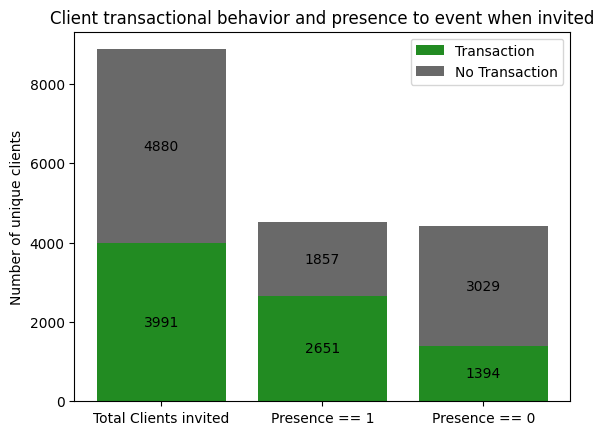

In [20]:
to_plot = ['Total Clients invited', 'Presence == 1', 'Presence == 0']
heights = [merged_df['client_id'].nunique(), merged_df[merged_df['client_is_present'] == 1].client_id.nunique(),
            merged_df[merged_df['client_is_present'] == 0].client_id.nunique()]

transactions_counts = {
    'Transaction': np.array([3991, 2651, 1394]),
    'No Transaction': np.array([4880, 1857, 3029]),
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

bar_colors = {
    'Transaction': 'forestgreen',
    'No Transaction': 'dimgrey' 
}

for transac, transac_count in transactions_counts.items():
    p = ax.bar(to_plot, transac_count, label=transac, bottom=bottom, color=bar_colors[transac])
    bottom += transac_count

    ax.bar_label(p, label_type='center')

ax.set_title('Client transactional behavior and presence to event when invited')
ax.set_ylabel('Number of unique clients')
ax.legend()

plt.show()

## Clients EDA

In [21]:
clients.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable'],
      dtype='object')

In [22]:
clients_country = pd.DataFrame(clients.groupby('client_country', as_index=False)['client_id'].count().sort_values(by='client_id', ascending=False))

In [23]:
clients_country['client_id'].sum()

np.int64(19095)

In [24]:
clients_country['client_id'].sum()

np.int64(19095)

In [25]:
clients_country['percentage_country'] = clients_country['client_id'] / clients_country['client_id'].sum()

In [26]:
clients_country

,client_country,client_id,percentage_country
1,AE,4905,0.256874
104,US,2515,0.131710
54,JP,1506,0.078869
36,FR,1426,0.074679
37,GB,1241,0.064991
...,...,...,...
96,SI,1,0.000052
68,MD,1,0.000052
65,LY,1,0.000052
32,EE,1,0.000052


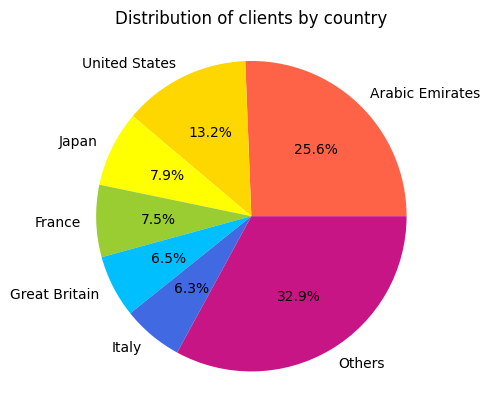

<Figure size 800x1000 with 0 Axes>

In [27]:
labels = 'Arabic Emirates', 'United States', 'Japan', 'France', 'Great Britain', 'Italy', 'Others'
sizes = [25.6, 13.2, 7.9, 7.5, 6.5, 6.3, 32.9]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%'
       , colors=['tomato', 'gold', 'yellow', 'yellowgreen', 'deepskyblue', 'royalblue', 'mediumvioletred']
       , radius=1.05)

plt.title('Distribution of clients by country')
plt.figure(figsize=(8,10))
plt.show()

## Transactions and Actions over time

In [30]:
number_transactions = pd.DataFrame(transactions.groupby('transaction_date', as_index=False)['transaction_id'].count())

In [61]:
agg = number_transactions.set_index('transaction_date').resample("ME").sum()
agg.reset_index(inplace=True)

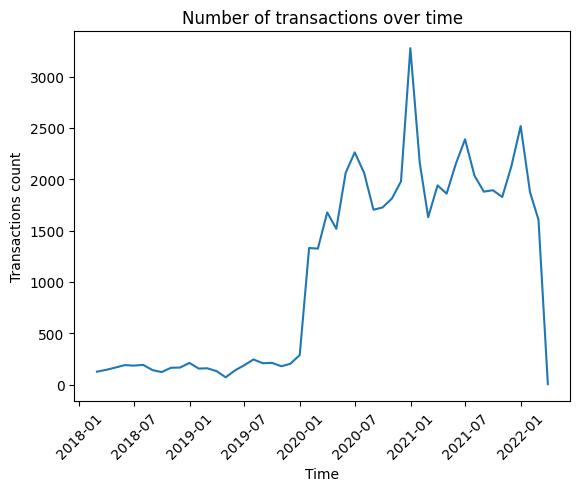

In [66]:
plt.plot(agg['transaction_date'], agg['transaction_id'])
plt.xticks(rotation=45)
plt.title('Number of transactions over time')
plt.ylabel('Transactions count')
plt.xlabel('Time')
plt.show()

In [70]:
transactions.columns

Index(['client_id', 'transaction_id', 'transaction_date', 'product_quantity',
       'gross_amount_euro', 'product_category', 'product_subcategory',
       'product_style'],
      dtype='object')

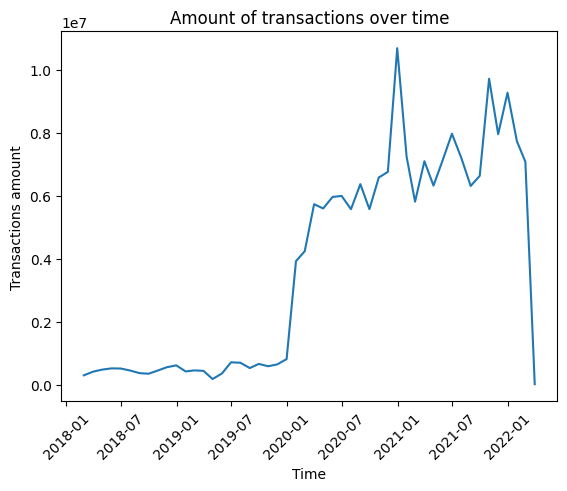

In [73]:
amount_transactions = pd.DataFrame(transactions.groupby('transaction_date', as_index=False)['gross_amount_euro'].sum())
agg1 = amount_transactions.set_index('transaction_date').resample("ME").sum()
agg1.reset_index(inplace=True)

plt.plot(agg1['transaction_date'], agg1['gross_amount_euro'])
plt.xticks(rotation=45)
plt.title('Amount of transactions over time')
plt.ylabel('Transactions amount')
plt.xlabel('Time')
plt.show()

In [76]:
print(f"mean transaction amount = {round(transactions['gross_amount_euro'].mean())}€")

mean transaction amount = 3443€


In [67]:
actions.columns

Index(['action_id', 'action_type_label', 'action_subcategory_label',
       'action_start_date', 'action_year', 'action_end_date',
       'action_collection_year', 'action_collection', 'action_universe',
       'action_category_label', 'action_channel', 'action_label', 'client_id',
       'client_is_present', 'client_is_invited'],
      dtype='object')

In [68]:
number_actions = pd.DataFrame(actions.groupby('action_start_date', as_index=False)['action_id'].count())

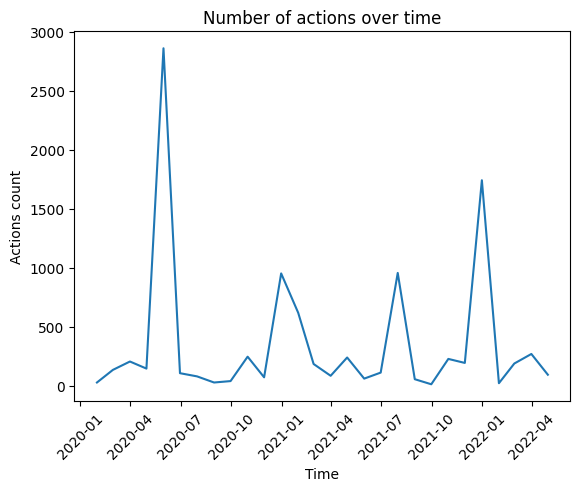

In [69]:
agg2 = number_actions.set_index('action_start_date').resample("ME").sum()
agg2.reset_index(inplace=True)

plt.plot(agg2['action_start_date'], agg2['action_id'])
plt.xticks(rotation=45)
plt.title('Number of actions over time')
plt.ylabel('Actions count')
plt.xlabel('Time')
plt.show()